# Introducción a [**PyTorch**](https://pytorch.org) <img src="https://pytorch.org/assets/images/pytorch-logo.png" width="40"/> - Parte II

**Aprendizaje Automático II**


En este notebook, extenderemos los conceptos básicos de **PyTorch** al uso de AutoGrad y `Datasets` y `Dataloaders`.


In [1]:
import torch
import numpy as np

## AutoGrad
### Uso de `.backward()`

#### Grafo de Cómputo

Recordemos el grafo de cómputo del Tema 2:

![image.png](attachment:fa10796e-e33e-4a3f-9d78-90b909670770.png)

Genera el grafo de cómputo con tensores `PyTorch`:

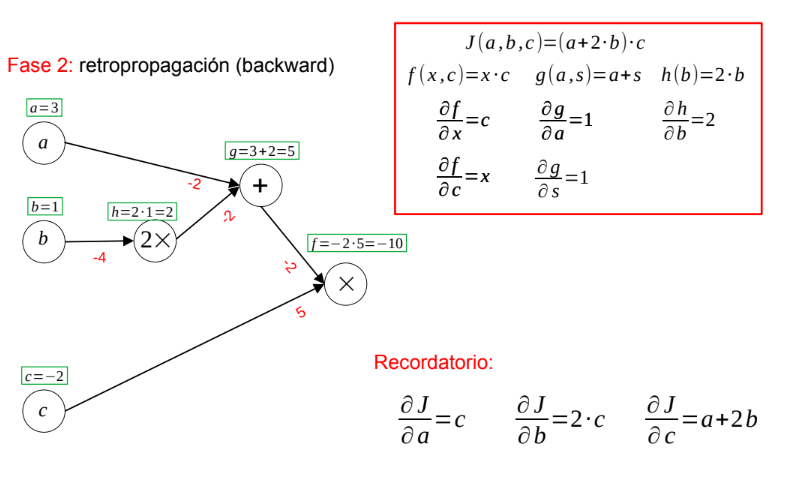

In [2]:
import torch

# Definición de tensores
a = torch.tensor([3.0], requires_grad=True)  # 'requires_grad=True' activa el cálculo de gradientes
b = torch.tensor([1.0], requires_grad=True)
c = torch.tensor([-2.0])   # sin 'requires_grad=True', no se almaceman en .grad los gradientes

###################### COMPLETAR ####################
# Operaciones
h = b*2

g = a+h

f = g*c
################### FIN COMPLETAR ###################

# Cálculo del gradiente
f.backward()  # Calcula el gradiente de f con respecto a los tensores con requires_grad=True

print(f"Valor de f: {f.item()}")

Valor de f: -10.0


Recuperemos los gradientes:

In [3]:
print(f"Gradiente de f con respecto a a: {a.grad}")
print(f"Gradiente de f con respecto a b: {b.grad}")
print(f"Gradiente de f con respecto a c: {c.grad}")
print(f"Gradiente de f con respecto a h: {h.grad}")
print(f"Gradiente de f con respecto a g: {g.grad}")
print(f"Gradiente de f con respecto a f: {f.grad}")

Gradiente de f con respecto a a: tensor([-2.])
Gradiente de f con respecto a b: tensor([-4.])
Gradiente de f con respecto a c: None
Gradiente de f con respecto a h: None
Gradiente de f con respecto a g: None
Gradiente de f con respecto a f: None


<ipython-input-3-54d2eaa31128>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(f"Gradiente de f con respecto a h: {h.grad}")
<ipython-input-3-54d2eaa31128>:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pyt

¿Por qué las derivadas con respecto a los nodos intermedios (h, g) ni el nodo final (f) no aparecen? (Presta atención al Warning)

autograd guarda solamente los tensores que son hojas en el grafo para ello usar .retain_grad()

In [4]:
import torch

a = torch.tensor([3.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)
c = torch.tensor([-2.0], requires_grad=True)



# Operaciones
h = b*2
h.retain_grad()
g = a+h
g.retain_grad()
f = g*c
f.retain_grad()

# ¿Qué permite retain_grad()?

# Cálculo del gradiente
f.backward()

print(f"Gradiente de f con respecto a a: {a.grad}")
print(f"Gradiente de f con respecto a b: {b.grad}")
print(f"Gradiente de f con respecto a c: {c.grad}")
print(f"Gradiente de f con respecto a h: {h.grad}")
print(f"Gradiente de f con respecto a g: {g.grad}")
print(f"Gradiente de f con respecto a f: {f.grad}")

Gradiente de f con respecto a a: tensor([-2.])
Gradiente de f con respecto a b: tensor([-4.])
Gradiente de f con respecto a c: tensor([5.])
Gradiente de f con respecto a h: tensor([-2.])
Gradiente de f con respecto a g: tensor([-2.])
Gradiente de f con respecto a f: tensor([1.])


### Uso de `torch.autogra.grad`

Además de `.backward()`, podemos hacer uso de `torch.autograd.grad` como herramienta genérica de cálculo de gradientes:

In [5]:
import torch

# Definición de tensores
a = torch.tensor([3.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)
c = torch.tensor([-2.0], requires_grad=True)

###################### COMPLETAR ####################
# Construcción del grafo
h = b*2

g = a+h

f = g*c
# Calcular gradiente de f respecto a a usando torch.autograd.grad
grad_a =  torch.autograd.grad(f, a)
################### FIN COMPLETAR ###################

# Mostrar resultados
print(f"Valor de f: {f.item()}")
print(f"Gradiente de f con respecto a a: {grad_a[0].item()}")

Valor de f: -10.0
Gradiente de f con respecto a a: -2.0


### Diferencias entre `.backward()` y `torch.autograd.grad`

|                     | `backward()`                          | `torch.autograd.grad`             |
|-----------------------------|----------------------------------------|------------------------------------|
| **Modifica `.grad`**         | Sí, almacena los gradientes en `.grad`. | No, devuelve los gradientes explícitamente. |
| **Uso**   | Entrenamiento con optimizadores. |Cómputo de gradientes puntuales. |
| **Argumentos**            | No requiere argumentos adicionales.   | Necesita especificar las variables. |


### Un caso de uso:
#### Optimización con Restricciones y Multiplicadores de Lagrange

El objetivo es minimizar
$$ f(x, y) = x^2 + y^2 $$
sujeto a la restricción
$$x + y = 1 \quad \to \quad x + y -1 = 0 \quad \to \quad (x + y -1)^2 = 0 $$

Para ello, definimos la Lagrangiana:

$$ L(x, y, \lambda) = x^2 + y^2 + \lambda (x + y - 1)^2 $$

donde $ \lambda $ es el multiplicador de Lagrange que penaliza las violaciones de la restricción.

La optimización se realiza mediante gradiente descendente, ajustando $ x $ y $ y $ mientras se asegura que $ x + y $ se mantenga cerca de 1.


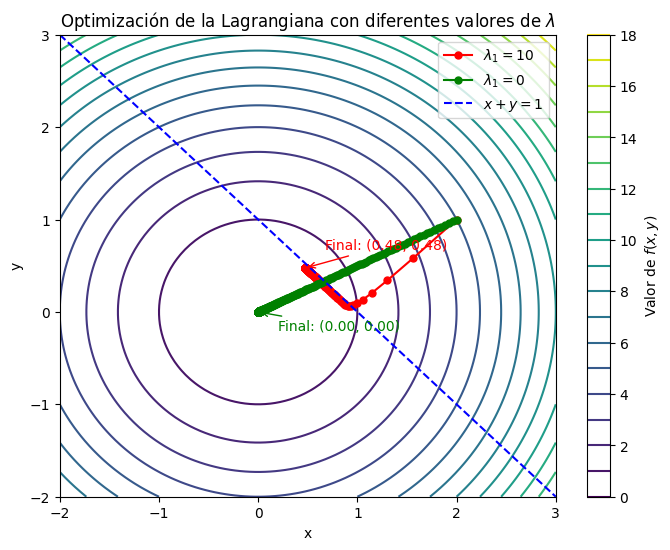

Resultado final con lambda_1 = 10: x = 0.4761911630630493, y = 0.4761897921562195
Resultado final con lambda_1 = 0: x = 3.3659321996282188e-09, y = 1.6829660998141094e-09


In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Función de coste penalizada (Lagrangiana)
def lagrangian(x, y, lambda_1):
    f = x**2 + y**2  # función objetivo
    g1 = x + y - 1   # restricción 1
    # Lagrangiana con multiplicador de Lagrange
    L = f + lambda_1 * g1**2
    return L

# Hiperparámetros
learning_rate = 0.01
num_iterations = 1000

# Función para realizar la optimización con diferentes valores de lambda_1
def optimize(lambda_1):
    # Inicializar las variables de optimización
    x = torch.tensor(2.0, requires_grad=True)  # variable x
    y = torch.tensor(1.0, requires_grad=True)  # variable y

    progress_x = []
    progress_y = []
    progress_L = []

    # Proceso de optimización utilizando gradiente descendente
    for iteration in range(num_iterations):
        # Calcular la Lagrangiana
        L = lagrangian(x, y, lambda_1)

        # Calcular los gradientes de la Lagrangiana
        grad_x, grad_y = torch.autograd.grad(L, [x, y])

        progress_x.append(x.item())
        progress_y.append(y.item())
        progress_L.append(L.item())

        # Actualizar las variables utilizando el gradiente descendente
        x.data -= learning_rate * grad_x
        y.data -= learning_rate * grad_y

    return progress_x, progress_y, x.item(), y.item()

# Ejecutar la optimización con lambda_1 = 10.0 y lambda_1 = 0
progress_x_lambda_10, progress_y_lambda_10, final_x_lambda_10, final_y_lambda_10 = optimize(10.0)
progress_x_lambda_0, progress_y_lambda_0, final_x_lambda_0, final_y_lambda_0 = optimize(0.0)

# Visualización en 2D de la función objetivo y el progreso de la optimización

# Crear una malla de valores de x y y
x_vals = np.linspace(-2, 3, 100)
y_vals = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Función objetivo f(x, y) = x^2 + y^2
Z = X**2 + Y**2

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 6))

# Contorno de la función objetivo
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimización de la Lagrangiana con diferentes valores de $\\lambda$')

# Progreso de la optimización con lambda_1 = 10 (línea roja)
ax.plot(progress_x_lambda_10, progress_y_lambda_10, marker='o', color='red', markersize=5, label='$\\lambda_1 = 10$')

# Progreso de la optimización con lambda_1 = 0 (línea verde)
ax.plot(progress_x_lambda_0, progress_y_lambda_0, marker='o', color='green', markersize=5, label='$\\lambda_1 = 0$')

# Añadir la restricción (recta x + y = 1)
x_line = np.linspace(-2, 3, 100)
y_line = 1 - x_line  # y = 1 - x
ax.plot(x_line, y_line, color='blue', label='$x + y = 1$', linestyle='--')

# Añadir una etiqueta en el último punto de lambda_1 = 10
ax.annotate(f"Final: ({final_x_lambda_10:.2f}, {final_y_lambda_10:.2f})",
            xy=(progress_x_lambda_10[-1], progress_y_lambda_10[-1]),
            xytext=(progress_x_lambda_10[-1]+0.2, progress_y_lambda_10[-1]+0.2),
            arrowprops=dict(arrowstyle="->", color='red'),
            color='red')

# Añadir una etiqueta en el último punto de lambda_1 = 0
ax.annotate(f"Final: ({final_x_lambda_0:.2f}, {final_y_lambda_0:.2f})",
            xy=(progress_x_lambda_0[-1], progress_y_lambda_0[-1]),
            xytext=(progress_x_lambda_0[-1]+0.2, progress_y_lambda_0[-1]-0.2),
            arrowprops=dict(arrowstyle="->", color='green'),
            color='green')

# Mostrar la leyenda y el gráfico
ax.legend()
plt.colorbar(contour, ax=ax, label="Valor de $f(x, y)$")
plt.show()

# Resultado final para ambas soluciones
print(f"Resultado final con lambda_1 = 10: x = {final_x_lambda_10}, y = {final_y_lambda_10}")
print(f"Resultado final con lambda_1 = 0: x = {final_x_lambda_0}, y = {final_y_lambda_0}")


## `Datasets` y `Dataloaders`

Un Dataset en PyTorch permite estructurar y preparar los datos de forma personalizada. Vamos a ver cómo implementar una clase Dataset personalizada para trabajar con unos datos generados.

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader

# Creamos unos datos de ejemplo
data = [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0]]
labels = [0, 1, 0, 1]

### `Dataset`

In [8]:
# Implementación de un Dataset
class MyDataset(Dataset):
    def __init__(self, data, labels):
        """
        Constructor del Dataset.
        Args:
            data (list o array): Datos de entrada.
            labels (list o array): Etiquetas correspondientes a los datos.
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        """
        Devuelve el tamaño del Dataset.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Devuelve un dato y su etiqueta correspondiente en el índice `idx`.
        """
        return self.data[idx], self.labels[idx]

# Creamos un ejemplo simple
data = [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0]]
labels = [0, 1, 0, 1]

# Crear el Dataset
dataset = MyDataset(data, labels)

# Mostrar información
print(f"Tamaño del Dataset: {len(dataset)}")
print(f"Primer dato: {dataset[0]}")
print(f"Segundo dato: {dataset[1]}")
print(f"Tercer dato: {dataset[2]}")
print(f"Cuarto dato: {dataset[3]}")


Tamaño del Dataset: 4
Primer dato: ([1.0, 2.0], 0)
Segundo dato: ([3.0, 4.0], 1)
Tercer dato: ([5.0, 6.0], 0)
Cuarto dato: ([7.0, 8.0], 1)


### `Dataloader`

Con el dataset anterior y la documentación de `PyTorch`, usa `Dataloader`para iterar sobre el conjunto de datos por *batches* (`batch_size=2`) aleatoriamente.

In [15]:
################ COMPLETAR ################

# El DataLoader divide el Dataset en lotes (batches) y los prepara para su uso en modelos.
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Mostrar los datos en lotes
for batch_idx, (batch_data, batch_labels) in enumerate(dataloader):
    print(f"Lote {batch_idx + 1}:")
    print(f"Datos: {batch_data}")
    print(f"Etiquetas: {batch_labels}")

############## FIN COMPLETAR ##############

Lote 1:
Datos: [tensor([7., 1.], dtype=torch.float64), tensor([8., 2.], dtype=torch.float64)]
Etiquetas: tensor([1, 0])
Lote 2:
Datos: [tensor([3., 5.], dtype=torch.float64), tensor([4., 6.], dtype=torch.float64)]
Etiquetas: tensor([1, 0])


¿Qué tipo tienen los datos antes y después de usar `Dataloader`?